###### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 
Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

### Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset

In [2]:
#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("day.csv")

In [5]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
(df.isna().sum()).sum()

0

In [7]:
#No of unique values
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df=df.drop(columns=['instant', 'dteday']) 
df.drop(['casual','registered'],axis=1,inplace=True)
#since Instant is jst index, dteday is redundant as details are given in "yr" and "mnth and Casual+registered=cnt
#here i have used both ways to delete, for personal practice 
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
df.shape

(730, 12)

In [11]:
df[['season']]=df[['season']].apply(lambda x: x.map ({1:"spring",2:"summer",3:"fall",4:"winter"}))
# or df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)


In [12]:
# Other way
df['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)


In [13]:
# by Defining the map function
def binary_map(x):
    return x.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

# Applying the function to the housing list
df[['weekday']] = df[['weekday']].apply(binary_map)

In [14]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [16]:
#changing datatypes of numerical columns to appropriate types

df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
#This function will try to change non-numeric objects (such as strings) into integers or floating-point numbers as appropriate.
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [17]:
df.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [18]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### Step 2: Visualising the Data

<Figure size 1600x1000 with 0 Axes>

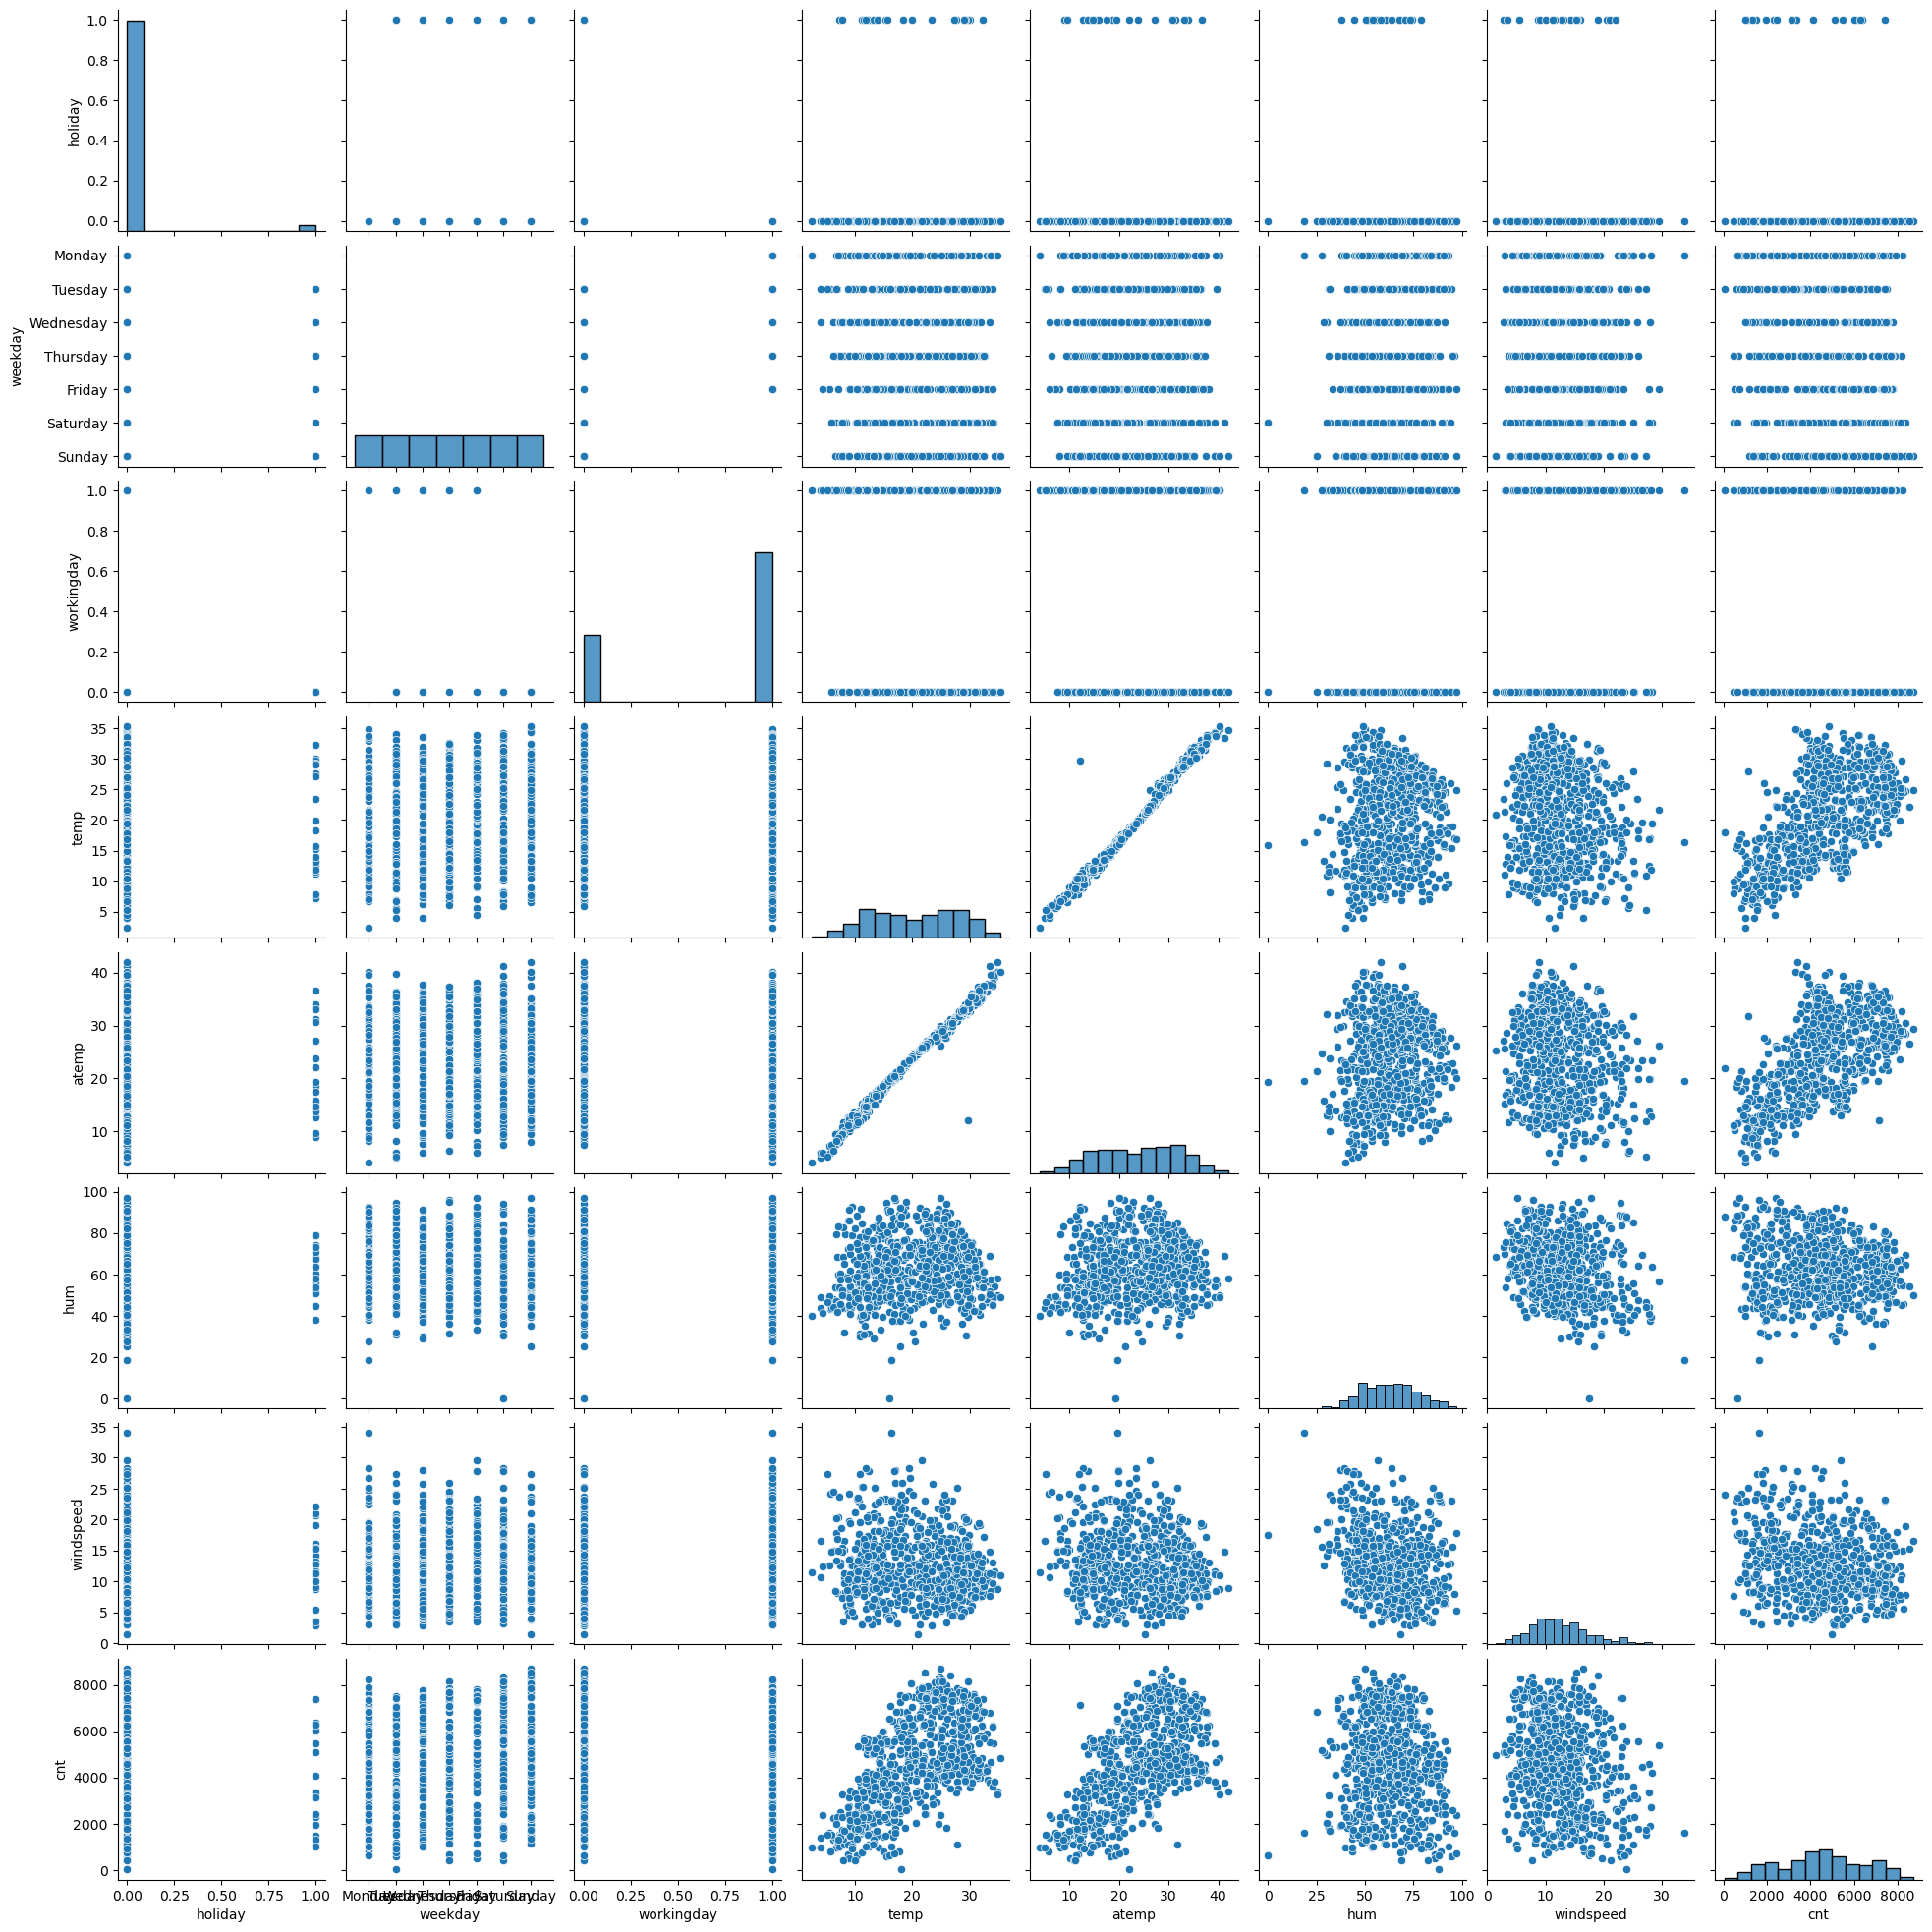

In [19]:
plt.figure(figsize = (16, 10))
sns.pairplot(df,vars=['holiday', 'weekday', 'workingday','temp', 'atemp', 'hum', 'windspeed', 'cnt'])
plt.show()

In [20]:
df.corr()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000e+00,-5.162656e-16,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,-5.162656e-16,1.000000e+00,0.018905,-0.010414,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,8.195345e-03,1.890483e-02,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-1.185197e-02,-1.041372e-02,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,4.878919e-02,2.190833e-01,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,4.721519e-02,2.264302e-01,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-1.125471e-01,2.249368e-01,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-1.162435e-02,-2.080131e-01,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,5.697285e-01,2.781909e-01,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


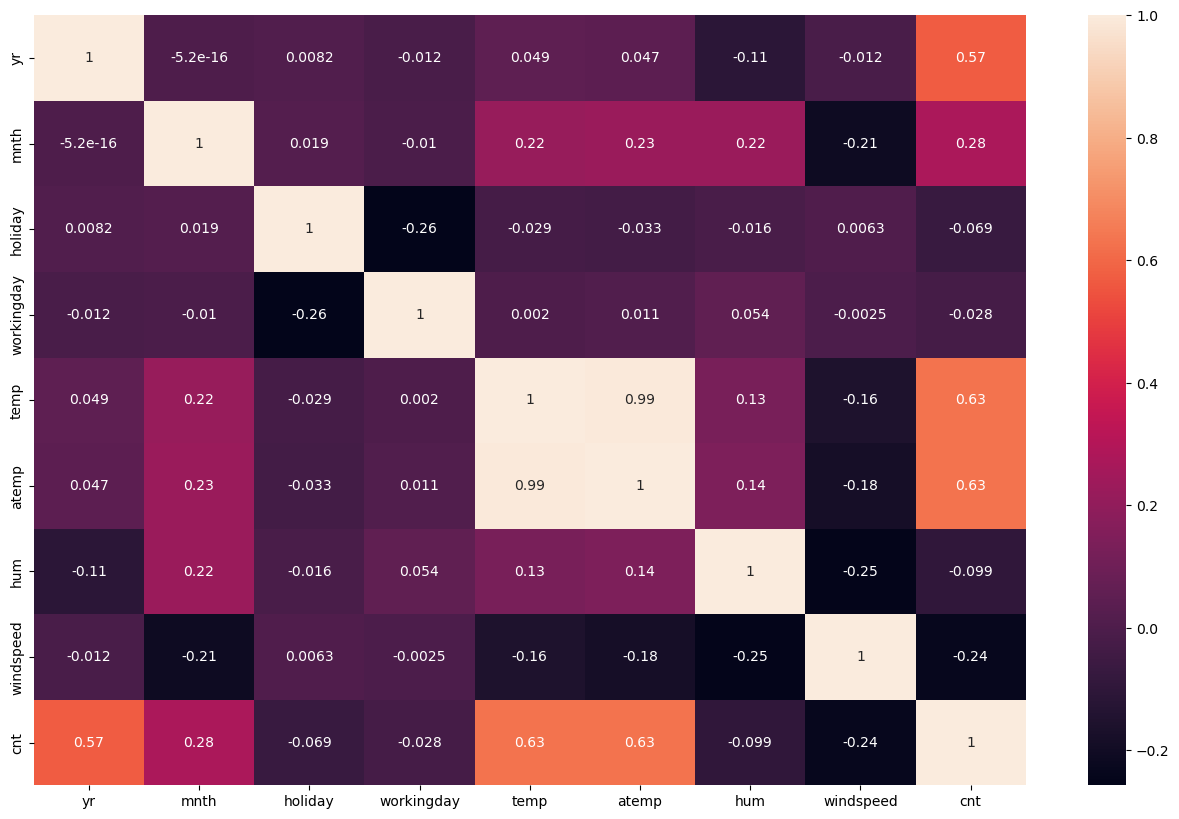

In [21]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### from above chart it is visible that corilation between temp i.e temperature in Celsius and atemp: feeling temperature in Celsius is 0.99 which is very high that means they are inter-dependant variables. Hence we will drop any one of them.

In [22]:
df.drop(["temp"],axis=1,inplace=True)
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349


### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


In [24]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

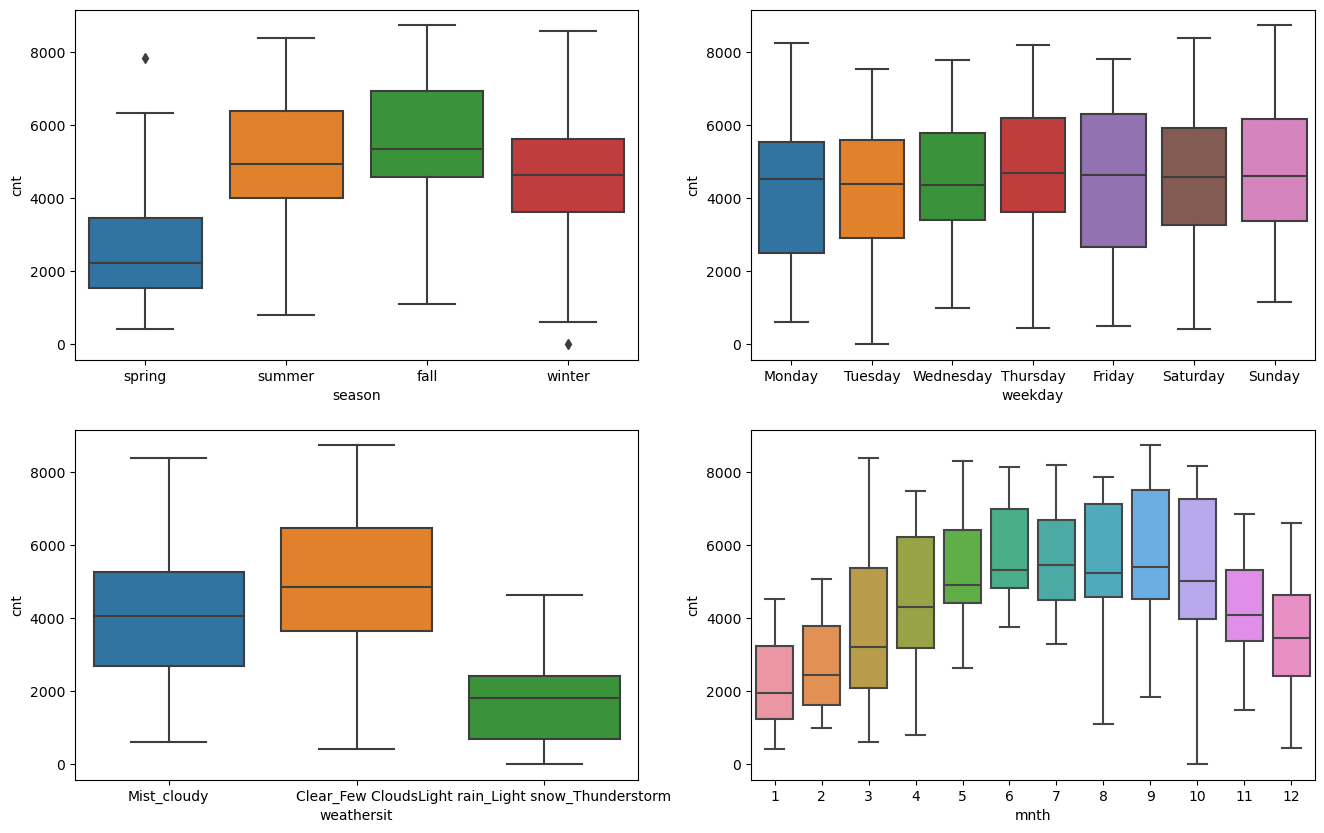

In [25]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.show()

#### We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for furnishingstatus with airconditioning as the hue.

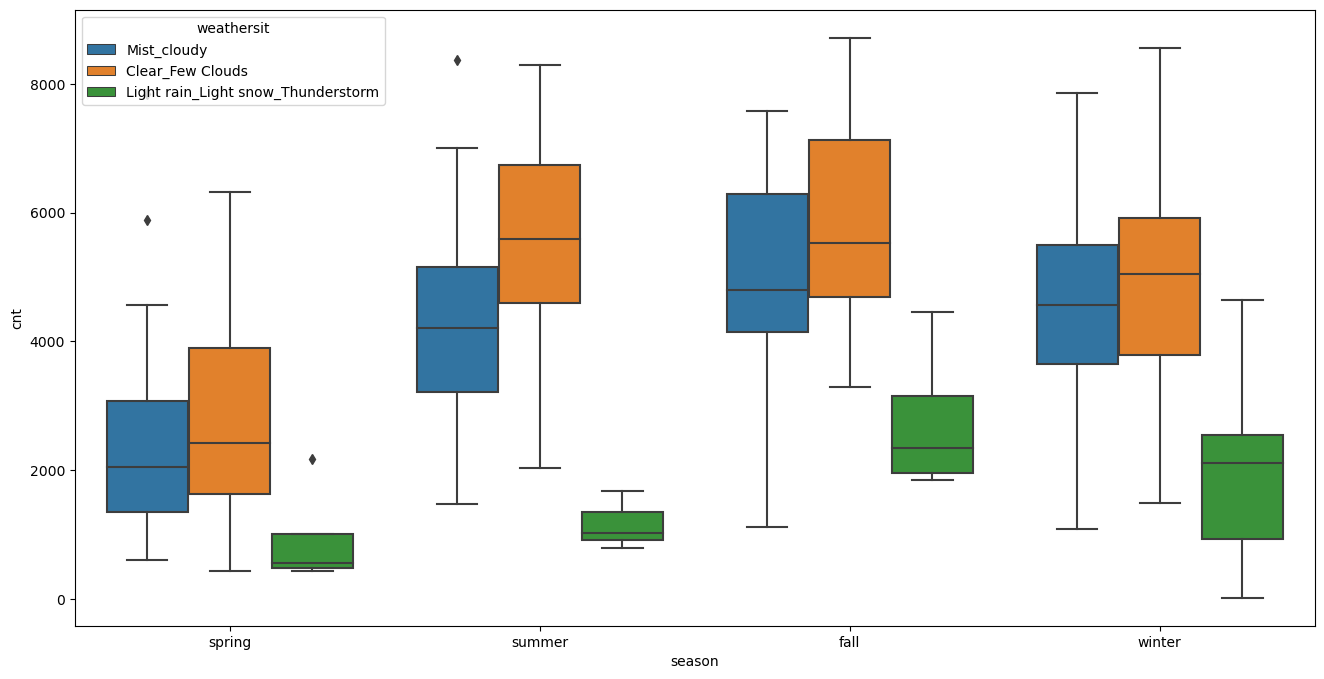

In [26]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = df)
plt.show()

### Dealing with Outliers

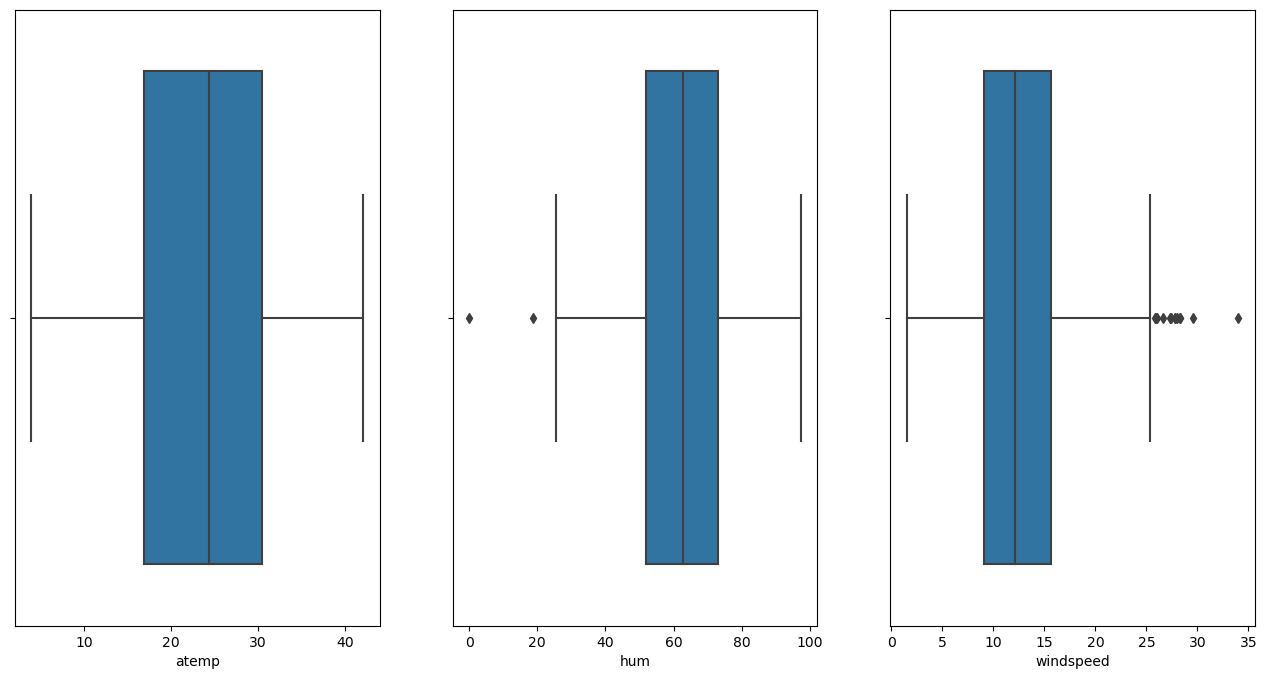

In [27]:
plt.figure(figsize = (16, 8))
plt.subplot(1,3,1)
sns.boxplot(df['atemp'])
plt.subplot(1,3,2)
sns.boxplot(df['hum'])
plt.subplot(1,3,3)
sns.boxplot(df['windspeed'])
plt.show()

In [28]:
df = df.drop(index = df[(df['windspeed'] > 30)].index)
df = df.drop(index = df[(df['hum'] < 20)].index)

In [29]:
df.shape

(728, 11)

### Data Preparation

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      728 non-null    object 
 1   yr          728 non-null    int64  
 2   mnth        728 non-null    int64  
 3   holiday     728 non-null    int64  
 4   weekday     728 non-null    object 
 5   workingday  728 non-null    int64  
 6   weathersit  728 non-null    object 
 7   atemp       728 non-null    float64
 8   hum         728 non-null    float64
 9   windspeed   728 non-null    float64
 10  cnt         728 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 68.2+ KB


In [31]:
#Converting variables to object type
df['mnth']=df['mnth'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      728 non-null    object 
 1   yr          728 non-null    int64  
 2   mnth        728 non-null    object 
 3   holiday     728 non-null    int64  
 4   weekday     728 non-null    object 
 5   workingday  728 non-null    int64  
 6   weathersit  728 non-null    object 
 7   atemp       728 non-null    float64
 8   hum         728 non-null    float64
 9   windspeed   728 non-null    float64
 10  cnt         728 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 68.2+ KB


#### Dummy variables

In [32]:
d1 = pd.get_dummies(df['season'], drop_first = True)
d2 = pd.get_dummies(df['mnth'], drop_first = True)
d3=pd.get_dummies(df["weekday"], drop_first=True)
d4=pd.get_dummies(df["weathersit"],drop_first=True)

In [33]:
df=pd.concat([df,d1,d3,d4,d2],axis=1)

In [34]:
df=df.drop(columns=['season','weekday','weathersit','mnth'])
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df_train, df_test = train_test_split(df,train_size=0.8,random_state=20)

In [37]:
df_train.shape

(582, 29)

In [38]:
df_train.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          2,
                                          3,
                                          4,
                                          5,
          

#### Rescaling the Features
We will use MinMax scaling.

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [40]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
591,1,0,1,0.754722,0.508700,0.351597,0.834963,0,0,0,...,0,0,0,0,0,1,0,0,0,0
294,0,0,1,0.454726,0.522042,0.167652,0.468067,0,0,1,...,0,0,0,0,0,0,0,1,0,0
207,0,0,1,0.802804,0.207077,0.384261,0.510081,0,0,0,...,0,0,0,0,1,0,0,0,0,0
253,0,0,1,0.695906,0.639791,0.221061,0.557165,0,0,0,...,0,0,0,0,0,0,1,0,0,0
405,1,0,0,0.281545,0.397912,0.225534,0.410479,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,...,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,0.498282,0.027491,0.689003,0.522913,0.524668,0.396548,0.491175,0.243986,0.261168,0.235395,...,0.091065,0.082474,0.087629,0.084192,0.087629,0.085911,0.082474,0.080756,0.079038,0.084192
std,0.500427,0.163651,0.463300,0.214666,0.198397,0.181852,0.231459,0.429854,0.439649,0.424611,...,0.287949,0.275322,0.282998,0.277915,0.282998,0.280473,0.275322,0.272694,0.270030,0.277915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340567,0.373840,0.267066,0.330647,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.543405,0.515081,0.373142,0.496076,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.698389,0.667343,0.497535,0.664222,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

In [42]:
y_train=df_train.pop("cnt")
X_train=df_train

In [43]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Monday,...,3,4,5,6,7,8,9,10,11,12
591,1,0,1,0.754722,0.508700,0.351597,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
294,0,0,1,0.454726,0.522042,0.167652,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
207,0,0,1,0.802804,0.207077,0.384261,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
253,0,0,1,0.695906,0.639791,0.221061,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
405,1,0,0,0.281545,0.397912,0.225534,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y_train.head()

591    0.834963
294    0.468067
207    0.510081
253    0.557165
405    0.410479
Name: cnt, dtype: float64

## Building our model
We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (Recursive feature elimination)

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [46]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=15, step=1, verbose=0, importance_getter='auto')
#or rfe=RFE(lm)
rfe=rfe.fit(X_train,y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 9),
 ('Wednesday', False, 10),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', False, 2),
 (2, False, 6),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 12),
 (12, False, 11)]

In [48]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'features' : X_train.columns,'rank' : rfe.ranking_, 'support': rfe.support_ }).sort_values(by='rank',ascending=True)
rfe_ranking

,features,rank,support
0,yr,1,True
19,4,1,True
18,3,1,True
15,Light rain_Light snow_Thunderstorm,1,True
23,8,1,True
24,9,1,True
20,5,1,True
8,winter,1,True
21,6,1,True
6,spring,1,True


In [49]:
col=X_train.columns[rfe.support_]
col

#"""OR Coll = rfe_ranking.loc[rfe_ranking['rank'] == 1 & 2,'features'].values """

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index([ 'workingday',      'summer',      'Monday',    'Saturday',
            'Sunday',    'Thursday',     'Tuesday',   'Wednesday',
       'Mist_cloudy',             2,             7,            11,
                  12],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [51]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [52]:
#adding constant variable
import statsmodels.api as sm
X_train_rfe1=sm.add_constant(X_train_rfe)

In [53]:
# Running the linear model
lm=sm.OLS(y_train,X_train_rfe1).fit()

In [54]:
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     191.1
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          4.72e-210
Time:                        22:23:22   Log-Likelihood:                 550.84
No. Observations:                 582   AIC:                            -1070.
Df Residuals:                     566   BIC:                            -999.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [55]:
# Calculate the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,10.47
3,hum,9.55
4,windspeed,5.81
6,winter,2.98
5,spring,2.94
0,yr,2.03
12,8,1.75
10,5,1.72
9,4,1.68
11,6,1.67


In [56]:
X_train_rfe.columns

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9,
                                         10],
      dtype='object')

In [57]:
# VIF for 'hum' is too high so we delete it 1st and then check rest 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [58]:
X_train_rfe2=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     161.7
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          2.19e-187
Time:                        22:23:22   Log-Likelihood:                 494.25
No. Observations:                 582   AIC:                            -958.5
Df Residuals:                     567   BIC:                            -893.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#####  We can observe that not much difference is seen in the R-squared & Adj. R-squared after deleting the column "Hum"

In [59]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.38
3,windspeed,5.73
5,winter,2.22
4,spring,2.17
0,yr,2.01
11,8,1.72
10,6,1.66
13,10,1.60
8,4,1.56
9,5,1.55


In [60]:
# VIF for 'atemp' is  high so we delete it and then check 
df1=X_train_rfe
X_train_rfe3=df1.drop(['atemp'],axis=1)
X_train_rfe3.head()

,yr,holiday,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,3,4,5,6,8,9,10
591,1,0,0.351597,0,0,0,0,0,0,0,1,0,0
294,0,0,0.167652,0,1,0,0,0,0,0,0,0,1
207,0,0,0.384261,0,0,0,0,0,0,0,0,0,0
253,0,0,0.221061,0,0,0,0,0,0,0,0,1,0
405,1,0,0.225534,1,0,0,0,0,0,0,0,0,0


In [61]:
X_train_rfe3=sm.add_constant(X_train_rfe3)
lm=sm.OLS(y_train,X_train_rfe3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          6.12e-159
Time:                        22:23:22   Log-Likelihood:                 424.07
No. Observations:                 582   AIC:                            -820.1
Df Residuals:                     568   BIC:                            -759.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

######  We can observe that  much difference is seen in the R-squared & Adj. R-squared after deleting the column "atemp", hence it is not advisable
Let us check the VIF and R-squared & Adj. R-squared after deleting "windspeed"

In [62]:
df3=X_train_rfe
X_train_rfe5=df1.drop(['windspeed'],axis=1)
X_train_rfe5.head()

,yr,holiday,atemp,spring,winter,Light rain_Light snow_Thunderstorm,3,4,5,6,8,9,10
591,1,0,0.754722,0,0,0,0,0,0,0,1,0,0
294,0,0,0.454726,0,1,0,0,0,0,0,0,0,1
207,0,0,0.802804,0,0,0,0,0,0,0,0,0,0
253,0,0,0.695906,0,0,0,0,0,0,0,0,1,0
405,1,0,0.281545,1,0,0,0,0,0,0,0,0,0


In [63]:
X_train_rfe5=sm.add_constant(X_train_rfe5)
lm=sm.OLS(y_train,X_train_rfe5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     170.4
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.29e-186
Time:                        22:23:23   Log-Likelihood:                 488.78
No. Observations:                 582   AIC:                            -949.6
Df Residuals:                     568   BIC:                            -888.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [64]:
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)
X_train_rfe.head()

,yr,holiday,atemp,spring,winter,Light rain_Light snow_Thunderstorm,3,4,5,6,8,9,10
591,1,0,0.754722,0,0,0,0,0,0,0,1,0,0
294,0,0,0.454726,0,1,0,0,0,0,0,0,0,1
207,0,0,0.802804,0,0,0,0,0,0,0,0,0,0
253,0,0,0.695906,0,0,0,0,0,0,0,0,1,0
405,1,0,0.281545,1,0,0,0,0,0,0,0,0,0


In [65]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.04
0,yr,2.01
4,winter,2.00
10,8,1.70
9,6,1.64
12,10,1.59
8,5,1.51
3,spring,1.49
11,9,1.41
7,4,1.30


In [66]:
X_train_rfe.head()

,yr,holiday,atemp,spring,winter,Light rain_Light snow_Thunderstorm,3,4,5,6,8,9,10
591,1,0,0.754722,0,0,0,0,0,0,0,1,0,0
294,0,0,0.454726,0,1,0,0,0,0,0,0,0,1
207,0,0,0.802804,0,0,0,0,0,0,0,0,0,0
253,0,0,0.695906,0,0,0,0,0,0,0,0,1,0
405,1,0,0.281545,1,0,0,0,0,0,0,0,0,0


#### As we can see that by removing "windspeed" the VIF for "atemp" goes down and the value of  R-squared & Adj. R-squared after deleting the column  is also not much affected. Hence we will keep with "atemp" while removing "windspeed"

### Residual Analysis of the train data
Checking if the error terms are also normally distributed.

In [67]:
y_train_cnt=lm.predict(X_train_rfe5)

In [68]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

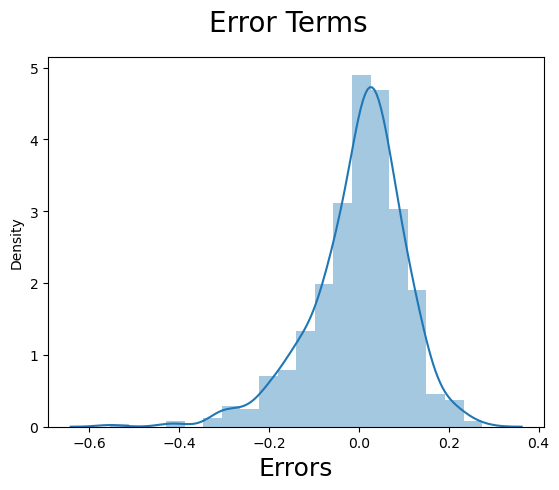

In [69]:
fig=plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'y_train-y_train_cnt')

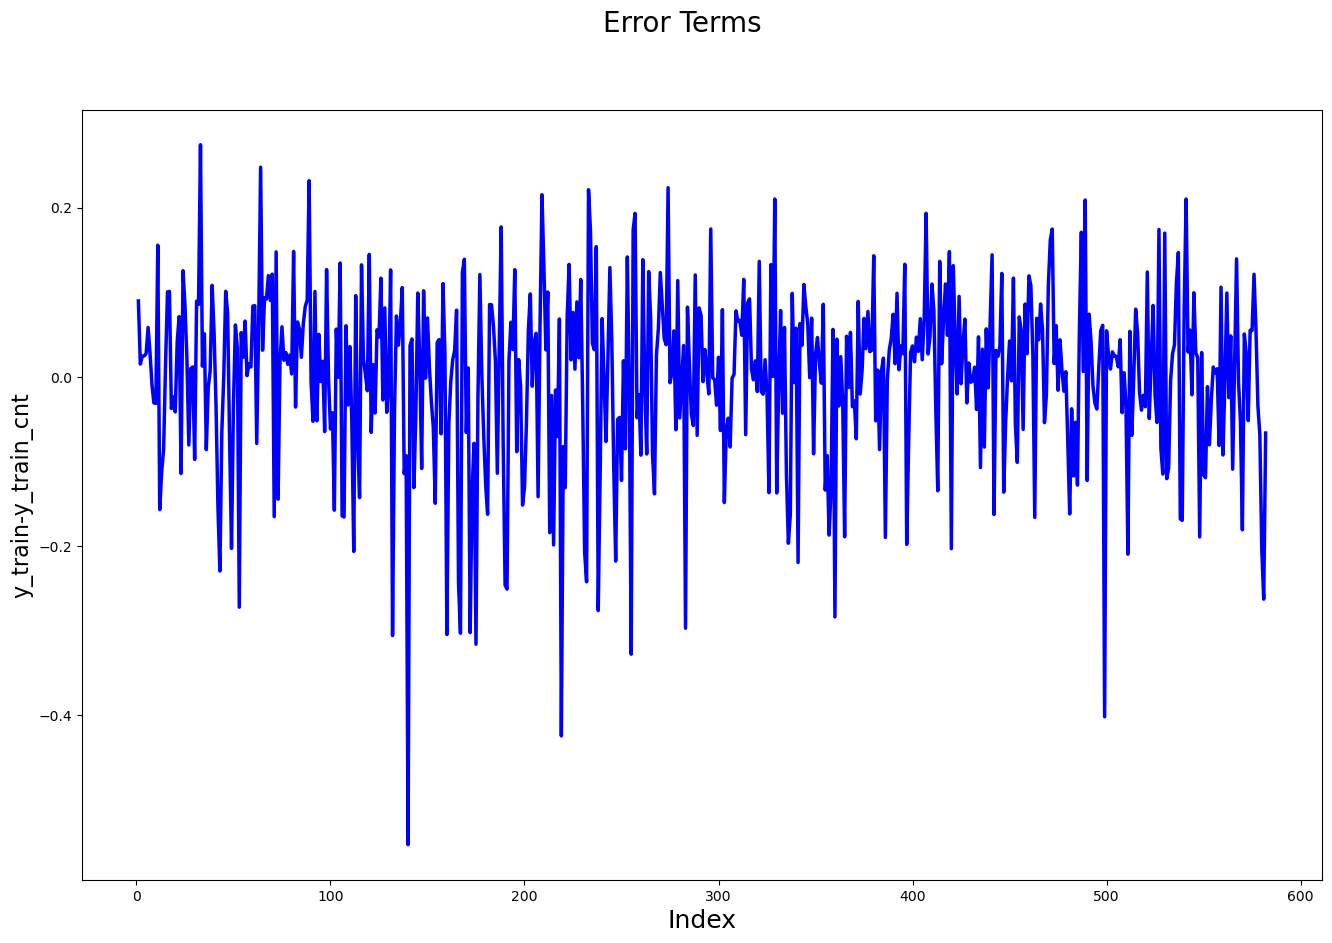

In [70]:
# Error terms
c = [i for i in range(1,len(X_train)+1,1)]
fig = plt.figure(figsize = (16, 10))
plt.plot(c,y_train-y_train_cnt, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_train-y_train_cnt', fontsize=16)                # Y-label

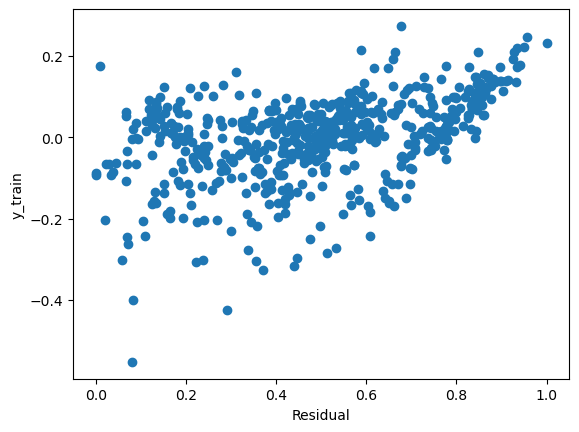

In [71]:
res=(y_train-y_train_cnt)
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

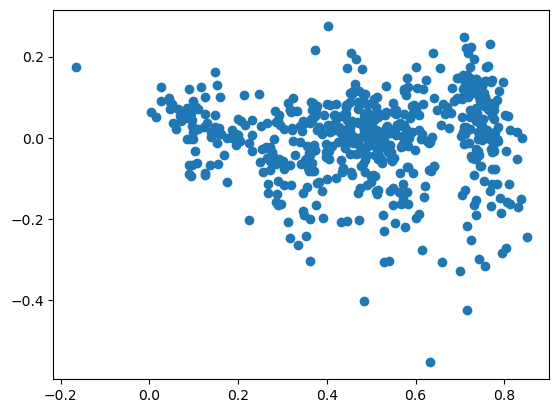

In [72]:
res=(y_train-y_train_cnt)
plt.scatter(y_train_cnt,res)
plt.show()

In [73]:
X_t=X_train_rfe5.iloc[:,0].values
X_t.shape

(582,)

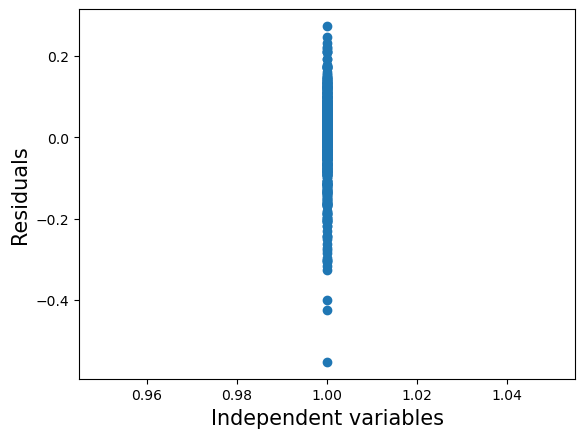

In [74]:
"""TEST"""
#PLotting the residuals to check for pattern existance
#Checking the assumption of autocorrelation and homoscedasticity 
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=15)              
plt.xlabel('Independent variables', fontsize=15)                          
plt.ylabel('Residuals', fontsize=15)  
plt.show()

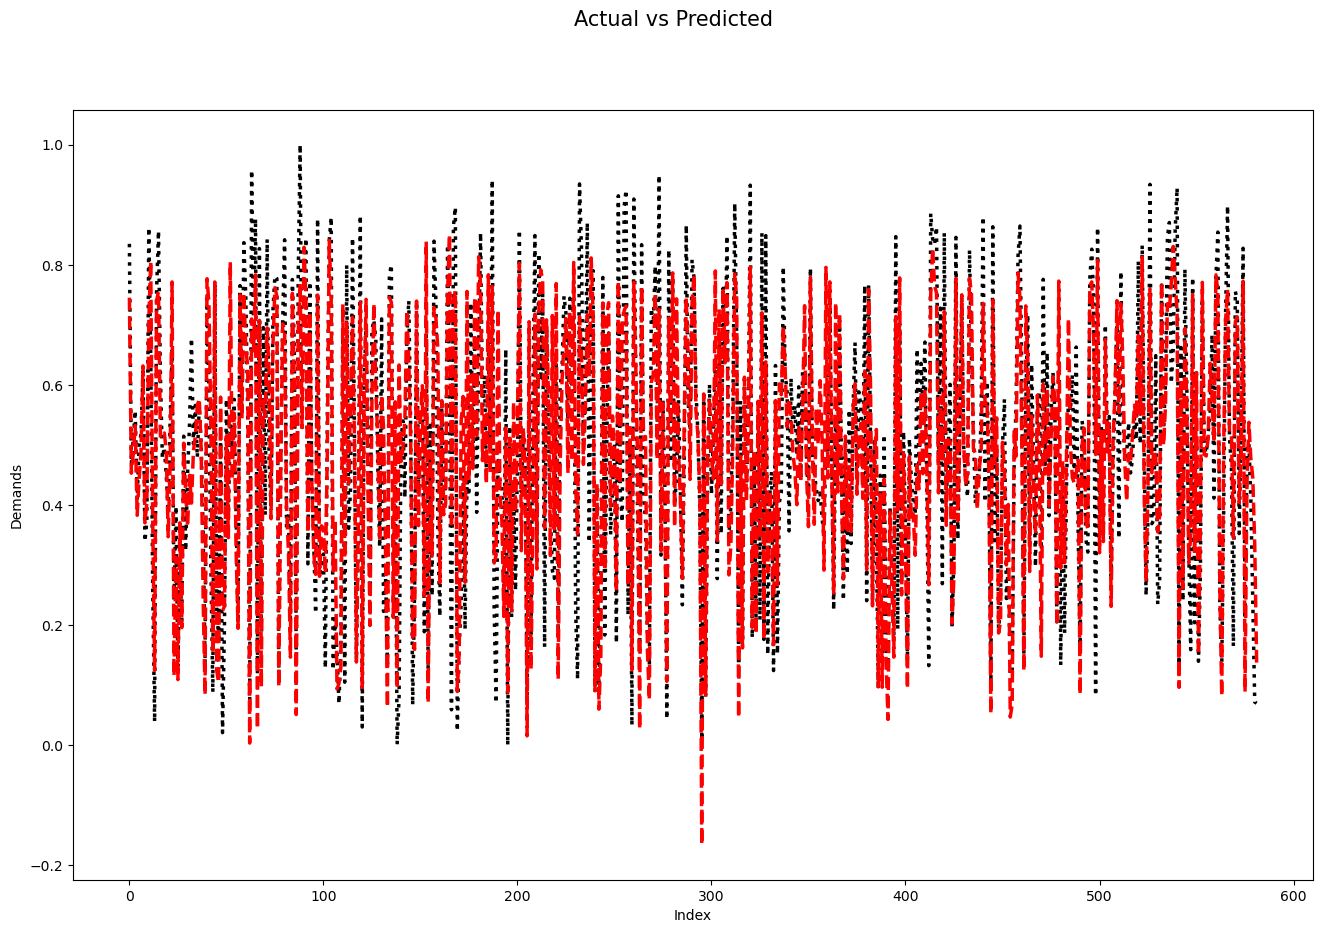

In [75]:
c = [i for i in range(0,len(y_train),1)]
plt.figure(figsize = (16, 10))
plt.plot(c,y_train, color="black", linewidth=2.5, linestyle='dotted')
plt.plot(c,y_train_cnt, color="red",  linewidth=2.5, linestyle='dashed')
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Making Predictions

### Applying the scaling on the test sets

In [76]:
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [77]:
# Now using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [78]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

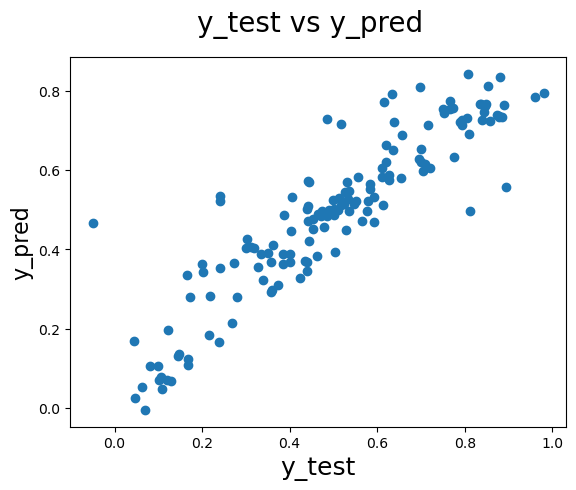

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [80]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.010767731569945415

In [81]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.10376768075824676

### r2_score

In [82]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_pred)

0.8116226094187877

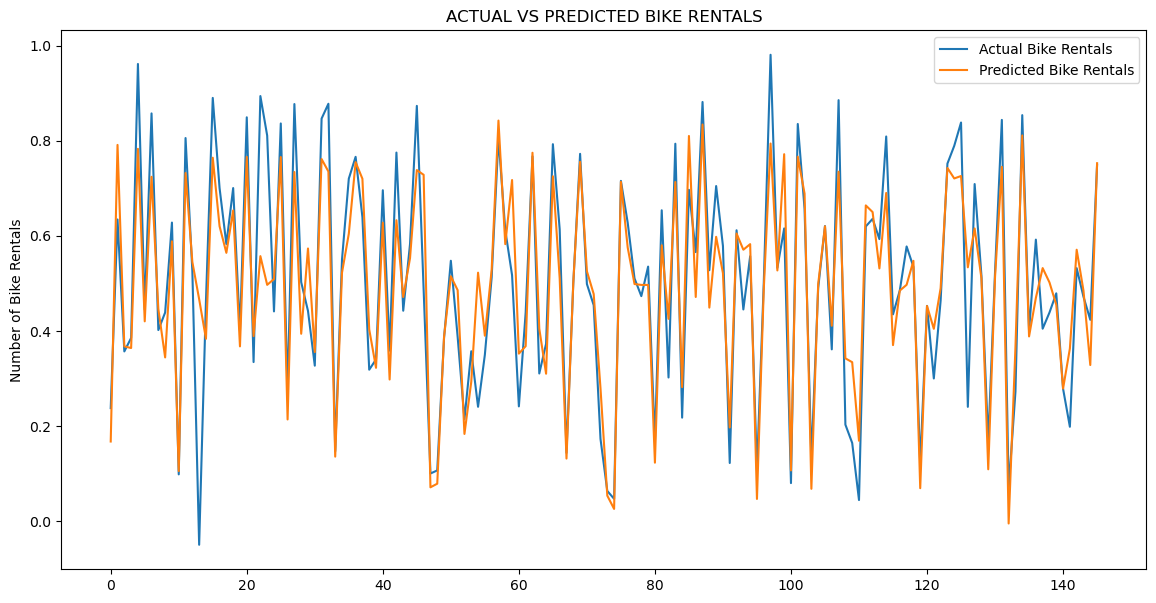

In [83]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(14)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual Bike Rentals','Predicted Bike Rentals'])
plt.title('ACTUAL VS PREDICTED BIKE RENTALS');
plt.ylabel('Number of Bike Rentals')
#plt.xticks([])
plt.show()

In [84]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     170.4
Date:                Tue, 29 Nov 2022   Prob (F-statistic):          3.29e-186
Time:                        22:23:24   Log-Likelihood:                 488.78
No. Observations:                 582   AIC:                            -949.6
Df Residuals:                     568   BIC:                            -888.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

### We can see that the equation of our best fitted line is:

##### cnt = 0.1168 + 0.2499*yr - 0.0672*holiday + 0.4594*atemp - 0.1132*spring + 0.0595*winter - 0.2444*(Light rain_Light snow_Thunderstorm) +0.0470*March + 0.0251*April + 0.0649*May + 0.0576*June + 0.0318*August+0.0958*September +0.0677*October                                                 

###### Accuracy i.e R2_Score comes out to be 81.16%                                                                                                                                                                

###### Root mean square error comes out to be 0.10

R-squared:                       0.796,                     
Adj. R-squared:                  0.791,                    
F-statistic:                     170.4

## Doing the same using sklearn.linear_model

In [85]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_rfe5,y_train)
re=lr.predict(X_test_new)

In [86]:
re.shape

(146,)

In [87]:
lr.score(X_test_new,y_test)  #model.score is another way of checking r_2 score

0.8116226094187877

In [88]:
r2_score(y_true=y_test,y_pred=re)

0.8116226094187877

In [89]:
print(lr.intercept_)
print(lr.coef_)

0.11684365664749408
[ 0.          0.24994937 -0.06721987  0.45943455 -0.11319517  0.05949854
 -0.24439452  0.04695559  0.02508593  0.06485776  0.0575881   0.0317963
  0.09580722  0.06774628]


###### the intercept and coefficient above comes out to be same as in statsmodel.api

In [90]:
#cross_val_score in module sklearn.model_selection._validation
from sklearn.model_selection import cross_val_score
cvr = cross_val_score(lr,X_train_rfe5,y_train, cv=20, n_jobs=1, verbose=5, fit_params=None, pre_dispatch='2*n_jobs', error_score=2)
cvr

[CV] END ................................ score: (test=0.858) total time=   0.0s
[CV] END ................................ score: (test=0.698) total time=   0.0s
[CV] END ................................ score: (test=0.847) total time=   0.0s
[CV] END ................................ score: (test=0.879) total time=   0.0s
[CV] END ................................ score: (test=0.671) total time=   0.0s
[CV] END ................................ score: (test=0.664) total time=   0.0s
[CV] END ................................ score: (test=0.737) total time=   0.0s
[CV] END ................................ score: (test=0.627) total time=   0.0s
[CV] END ................................ score: (test=0.774) total time=   0.0s
[CV] END ................................ score: (test=0.825) total time=   0.0s
[CV] END ................................ score: (test=0.890) total time=   0.0s
[CV] END ................................ score: (test=0.751) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


array([0.85758533, 0.69768276, 0.84651855, 0.87945363, 0.67056637,
       0.66393047, 0.73675308, 0.62720913, 0.77353811, 0.82489295,
       0.88973916, 0.75108434, 0.5045493 , 0.82596251, 0.83842764,
       0.85079491, 0.67520383, 0.704227  , 0.81505694, 0.83431857])

In [91]:
print("cross_val_score mean and std : %0.2f (+/- %0.2f)" % (cvr.mean(), cvr.std() * 2))

cross_val_score mean and std : 0.76 (+/- 0.20)


In [92]:
cvr.mean()

0.7633747287028376

In [93]:
cvr.std()

0.09861468537277167

#### We can Confirm the following details for the equation of our best fitted line is:
cnt = 0.1168 + 0.2499yr - 0.0672holiday + 0.4594atemp - 0.1132spring + 0.0595winter - 0.2444(Light rain_Light snow_Thunderstorm) +0.0470March + 0.0251April + 0.0649May + 0.0576June + 0.0318August+0.0958September +0.0677*October

Accuracy i.e Model Score/ R2_Score comes out to be 81.16%

Root mean square error comes out to be 0.10

R-squared: 0.796,
Adj. R-squared: 0.791,
F-statistic: 170.4